In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load training data sets 
df = pd.read_excel("C:\\Users\\hari_\\Documents\\tanz_features_water.xlsx")
df_labels = pd.read_excel("C:\\Users\\hari_\\Documents\\Tanz_water_labels.xlsx")

# merge features and labels into single data frame 
df = pd.merge(df, df_labels, on = "id")


In [3]:
# Explore the data set
# get to know about field data types,shape of df and null values 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   funder                 55765 non-null  object        
 4   gps_height             59400 non-null  int64         
 5   installer              55745 non-null  object        
 6   longitude              59400 non-null  float64       
 7   latitude               59400 non-null  float64       
 8   wpt_name               59400 non-null  object        
 9   num_private            59400 non-null  int64         
 10  basin                  59400 non-null  object        
 11  subvillage             59029 non-null  object        
 12  region                 59400 non-null  object        
 13  r

In [4]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
df.shape 

(59400, 41)

In [6]:
df.apply(lambda x: sum(x.isnull()))

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

 Cleaning the columns with null values and features with many unique values 



In [6]:
factors_to_change=['funder','installer','scheme_management']

In [7]:
factors_to_change 

['funder', 'installer', 'scheme_management']

In [11]:
for factor in factors_to_change:


    value_count=df[factor].value_counts()
    value_list = value_count.index[:5]
    for i in range(len(df)):
        if df.loc[i, factor] not in value_list:
            df.loc[i,factor] = 'other'
    

In [12]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,other,1390,other,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,other,1399,other,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,other,686,other,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,other,263,other,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,other,0,other,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [15]:
# The next feature to inspect is 'subvillage'.

print(df.subvillage.value_counts())




Madukani                   508
Shuleni                    506
Majengo                    502
Kati                       373
Mtakuja                    262
                          ... 
Kidihani                     1
Ibondo No2                   1
Ikukula                      1
Mazese                       1
Madugike Primary School      1
Name: subvillage, Length: 19287, dtype: int64


In [16]:
print(df.scheme_name.value_counts())


K                               682
None                            644
Borehole                        546
Chalinze wate                   405
M                               400
                               ... 
Ibukoni kimanga water supply      1
Mugoma spring source              1
RC MISSIONARY                     1
Kibena                            1
PIDP                              1
Name: scheme_name, Length: 2696, dtype: int64


In [17]:
# 19,287  and 2696 unique values in both columns, top values are not high as was the case in funder, insatller so we will drop this column 

In [18]:
df = df.drop(['subvillage','scheme_name'], axis=1)

In [19]:
df.public_meeting.value_counts()

1.0    51011
0.0     5055
Name: public_meeting, dtype: int64

In [20]:
# We only have two values here: true and false. This one can stay but we'll have to replace 
# the unknown data with a string value.

df.public_meeting = df.public_meeting.fillna('Unknown')

In [21]:
# same goes for permit name column 
df.permit.value_counts()

1.0    38852
0.0    17492
Name: permit, dtype: int64

In [22]:

df.permit = df.permit.fillna('Unknown')

In [23]:

df.apply(lambda x: sum(x.isnull()))

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
w

In [24]:
# no null values in columns,  look at columns with 
# string values and modify or remove them as we see fit.

In [25]:
string_cols = df.select_dtypes(include = ['object'])
string_cols.apply(lambda x: len(x.unique()))

funder                       6
installer                    6
wpt_name                 37400
basin                        9
region                      21
lga                        125
ward                      2092
public_meeting               3
recorded_by                  1
scheme_management            6
permit                       3
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
status_group                 3
dtype: int64

In [26]:

# Add column named 'status_group_vals' to allow the use of a pivot table to check differences
# between the different funders.

vals_to_replace = {'functional':2, 'functional needs repair':1,
                   'non functional':0}

df['status_group_vals']  = df.status_group.replace(vals_to_replace)

In [27]:

df.basin.value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [28]:

piv_table = pd.pivot_table(df, index=['basin', 'status_group'],
                           values=['status_group_vals'], aggfunc='count')
piv_table

status_group_vals
basin                   status_group                              
Internal                functional                            4482
                        functional needs repair                557
                        non functional                        2746
Lake Nyasa              functional                            3324
                        functional needs repair                250
                        non functional                        1511
Lake Rukwa              functional                            1000
                        functional needs repair                270
                        non functional                        1184
Lake Tanganyika         functional                            3107
                        functional needs repair                742
                        non functional                        2583
Lake Victoria           functional                            5100
                        functional needs repair                989
                        non functional                        4159
Pangani                 functional                            5372
                        functional needs repair                477
                        non functional                        3091
Rufiji                  functional                            5068
                        functional needs repair                437
                        non functional                        2471
Ruvuma / Southern Coast functional                            1670
                        functional needs repair                326
                        non functional                        2497
Wami / Ruvu             functional                            3136
                        functional needs repair                269
                        non functional                        2582

In [29]:
# Most basins have have more functional than non-functional pumps. Lake Rukwa
# and Ruvuma don't.

In [30]:

df.recorded_by.value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [31]:

# All data points have the same value so this offers no information that would help build our
# model.
df = df.drop('recorded_by', axis=1)

In [32]:
df.management.value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [33]:

df.management_group.value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [34]:
# both columns give related information to scheme management, so we will drop both columns 
df = df.drop(['management','management_group'],axis=1)

In [35]:

df.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [36]:

df.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [37]:
# both contain similar data, we will drop payment 
df = df.drop('payment', 1)

In [38]:
df.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [39]:

df.quality_group.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [40]:
# both contain similar data, we will drop quality_group 
df = df.drop('quality_group', 1)

In [41]:
df.wpt_name.value_counts()

none              3563
Shuleni           1748
Zahanati           830
Msikitini          535
Kanisani           323
                  ... 
Kwa Reteli           1
Masimbani            1
Kwa Yunus 1          1
Kwa Maganiko         1
Kwa Mzee Ahmad       1
Name: wpt_name, Length: 37400, dtype: int64

In [42]:
# too many values, and we don't require names for analysis , we will drop the wpt_names 

In [44]:
df = df.drop('wpt_name',1)

In [45]:
df.region.value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [46]:

#basin, lga, ward and region contain geographical information so there is a risk of them being
# highly correlated with each other, drop then for now and we will come back if required 

In [47]:
df = df.drop(['region', 'lga', 'ward'], axis=1)

In [49]:

# extraction_type, extraction_type_group and extraction_type_class appear to contain very similar
# data. I'll drop the first two and keep the last one.

df = df.drop(['extraction_type', 'extraction_type_group'], axis=1)

In [50]:

df.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [51]:
df.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [52]:

# Quantity and quantity_group contain identical data. Remove one and keep the other.

df = df.drop('quantity_group', 1)

In [53]:

df.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [54]:
df.source_type.value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [55]:

# Source and source_type contain very similar information so remove one and keep the other.

df = df.drop('source', 1)

In [84]:

# gps_height, longitude, latitude, region_code and district_code are all geographic info- not required for this problem 

In [57]:
df = df.drop(['gps_height', 'longitude', 'latitude', 'region_code', 'district_code',
             'num_private', 'id'], axis=1)

In [59]:

string_cols.apply(lambda x: len(x.unique()))

funder                       6
installer                    6
wpt_name                 37400
basin                        9
region                      21
lga                        125
ward                      2092
public_meeting               3
recorded_by                  1
scheme_management            6
permit                       3
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
status_group                 3
dtype: int64

In [60]:
# date recorded 
df.date_recorded.describe()

<ipython-input-60-7184fbb4188c>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.date_recorded.describe()


count                   59400
unique                    356
top       2011-03-15 00:00:00
freq                      572
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

In [61]:
# The most recent data is 2013-12-03, we will subtract each date from this point to obtain a 'days_since_recorded' column.

df.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(df.date_recorded)
df.columns = ['days_since_recorded' if x=='date_recorded' else x for x in df.columns]
df.days_since_recorded = df.days_since_recorded.astype('timedelta64[D]').astype(int)
df.days_since_recorded.describe()

<ipython-input-61-b1d9570c889d>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(df.date_recorded)


count    59400.000000
mean       613.616970
std        334.216374
min          0.000000
25%        297.000000
50%        419.000000
75%        977.000000
max       4068.000000
Name: days_since_recorded, dtype: float64

In [62]:
df.construction_year.value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [63]:
# lets group year values into bins like decades - categorical variable 

def year_to_decade(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'
    

In [64]:
df['construction_year'] = df.apply(lambda row: year_to_decade(row), axis=1)

In [65]:
df.population.describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

In [83]:
# populations data is skewed, 

In [67]:

df.amount_tsh.describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [68]:
df = df.drop('status_group_vals', 1)
df.to_csv('pump_train_for_models.csv', index=False)

In [69]:
# repeat process for test data 

In [76]:
test_df = pd.read_excel(r"C:\Users\hari_\Documents\tanz_water_test.xlsx")

test_df = test_df.drop(['gps_height', 'longitude', 'latitude', 'region_code', 'district_code',
                  'num_private', 'id', 'payment', 'management_group', 'management', 
                  'extraction_type', 'extraction_type_group', 'recorded_by','region', 'lga',
                  'ward', 'wpt_name', 'scheme_name', 'subvillage', 'quantity_group',
                 'quality_group', 'source'], axis=1)

test_df.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(test_df.date_recorded)
test_df.columns = ['days_since_recorded' if x=='date_recorded' else x for x in test_df.columns]
test_df.days_since_recorded = test_df.days_since_recorded.astype('timedelta64[D]').astype(int)

test_df.permit = test_df.permit.fillna('Unknown')
test_df.public_meeting = test_df.public_meeting.fillna('Unknown')


test_df['construction_year'] = test_df.apply(lambda row: year_to_decade(row), axis=1)


<ipython-input-76-c4283cefb7e6>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  test_df.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(test_df.date_recorded)


In [77]:
# same process for funder, installer, scheme_managemwent like train dataset

for factor in factors_to_change:


    value_count=test_df[factor].value_counts()
    value_list = value_count.index[:5]
    for i in range(len(test_df)):
        if test_df.loc[i, factor] not in value_list:
            test_df.loc[i,factor] = 'other'
    

In [78]:
test.funder.value_counts()

other                     10910
Government Of Tanzania     2215
Danida                      793
Hesawa                      580
World Bank                  352
Name: funder, dtype: int64

In [79]:

# We can save the test set now.

test_df.to_csv('pump_test_for_models.csv', index=False)

<AxesSubplot:xlabel='status_group', ylabel='count'>

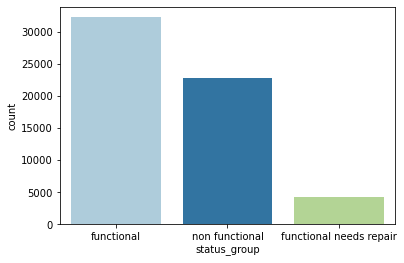

In [80]:
# exploring target variables 

sns.countplot(data=df, x="status_group", palette="Paired")

<AxesSubplot:>

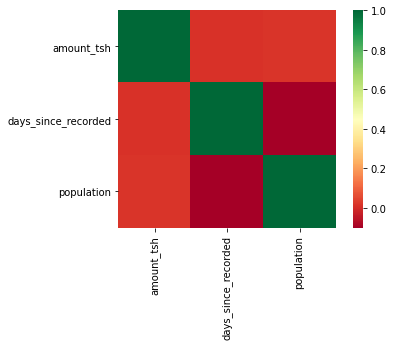

In [82]:
# correlation plot to confirm there are no correlated variables remaining 

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
